In [1]:
import json
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from openff.toolkit import Molecule

In [2]:
with open("database.json", 'r') as infile:
    db = json.load(infile)

In [3]:
db

{'mobley_1743409': {'d_charging': 0.042,
  'expt_reference': '10.1139/v91-2',
  'nickname': ' diethyl butanedioate',
  'expt_s (cal/K.mol)': 'Not available',
  'expt_h': 'Not available',
  'h_conf': 0.7387974134984716,
  'd_h_solv': 0.7005066537227272,
  'smiles': 'CCOC(=O)CCC(=O)OCC',
  'calc_h': -24.34251784532171,
  'd_expt_s (cal/K.mol)': 'Not available',
  'd_expt_h': 'Not available',
  'd_calc': 0.053,
  'iupac': 'diethyl butanedioate',
  'calc_charging': -10.397,
  'd_calc_h': 0.697757686308288,
  'd_h_conf': 0.06578621300971196,
  'd_vdw': 0.032,
  'd_expt': 0.6,
  'h_solv': -25.087679110094975,
  'd_calc_s (cal/mol.K)': 2.347032258029306,
  'expt': -5.71,
  'calc_vdw': 1.713,
  'expt_h_reference': 'Not available',
  'calc_reference': '10.1021/acs.jced.7b00104',
  'groups': ['carboxylic acid ester'],
  'calc': -8.683,
  'PubChemID': 31249,
  'notes': ['Experimental uncertainty not presently available, so assigned a default value.'],
  'calc_s (cal/mol.K)': -52.52228021238206},


In [4]:
for k,v in db.items():
    print(k, v['smiles'])

mobley_1743409 CCOC(=O)CCC(=O)OCC
mobley_9979854 C[C@H](C(F)(F)F)O
mobley_1873346 Cc1ccccc1
mobley_4715906 C[C@@H]1CCCC[C@@H]1C
mobley_3169935 c1ccc(c(c1)N)Cl
mobley_9729792 C1C=CC=CC=C1
mobley_6358463 c1ccc(c(c1)C(F)(F)F)C(F)(F)F
mobley_2845466 c1c2c(cc(c1Cl)Cl)Oc3cc(c(cc3O2)Cl)Cl
mobley_6006813 CCCC[N+](=O)[O-]
mobley_5445548 CC(C)c1ccccc1
mobley_3802803 CCCCCCO[N+](=O)[O-]
mobley_9028462 COC(=O)C(F)(F)F
mobley_4305650 CCC#N
mobley_1838110 C(C(F)(Cl)Cl)(F)(F)Cl
mobley_1770205 COP(=S)(OC)SCn1c(=O)c2ccccc2nn1
mobley_5393242 CCOP(=S)(OCC)Oc1cc(nc(n1)C(C)C)C
mobley_1722522 CCCC(=O)OCC
mobley_7610437 CC[C@H](C(C)C)O
mobley_1893937 CCCCCCCl
mobley_9209581 CN(C)C
mobley_6266306 C1CNC1
mobley_667278 c1cc(c(c(c1c2cc(c(c(c2Cl)Cl)Cl)Cl)Cl)Cl)Cl
mobley_8311303 c1cc(c(cc1c2c(c(cc(c2Cl)Cl)Cl)Cl)Cl)Cl
mobley_352111 CC(=O)OCCOC(=O)C
mobley_967099 CC(C)[N+](=O)[O-]
mobley_2693089 CC(C)Cc1cnccn1
mobley_4964807 CC(=O)CO[N+](=O)[O-]
mobley_4188615 CN(C)C(=O)c1ccccc1
mobley_9565165 c1ccc-2c(c1)Cc3c2cccc3

In [5]:
mols = []
for ligname in db.keys():
    mols.append(Chem.AddHs(Chem.MolFromSmiles(f"{db[ligname]['smiles']} {ligname}")))

In [6]:
len(mols)

642

In [7]:
cl_mols = []
for m in mols: 
    for a in m.GetAtoms():
        if a.GetAtomicNum() == 17:
            cl_mols.append(m)
            break
            

In [8]:
print(len(cl_mols))

114


In [9]:
cl_mols_oe = []
for m in cl_mols:
    cl_mols_oe.append(Molecule.from_rdkit(m, allow_undefined_stereo=True).to_openeye())

Warning (not error because allow_undefined_stereo=True): RDMol has unspecified stereochemistry. RDMol name: mobley_9571888Undefined chiral centers are:
 - Atom S (index 5)



In [24]:
from openeye.oechem import *
from openeye.oegraphsim import *
import numpy as np
import random

In [50]:
rand = random.randint(0,len(cl_mols_oe))
greedy_chosen_mols = [cl_mols_oe[rand]]

overall_tanimoto = np.zeros(len(cl_mols_oe))


i = 0
                            
while len(greedy_chosen_mols) < 10:
    chosen_mol = greedy_chosen_mols[i]
    
    tanimotos = []
    for mol in cl_mols_oe:

        fp1 = OEFingerPrint()
        OEMakeFP(fp1, chosen_mol, OEFPType_MACCS166)
        fp2 = OEFingerPrint()
        OEMakeFP(fp2, mol, OEFPType_MACCS166)

        # Calculate the Tanimoto score
        tanimoto_score = OETanimoto(fp1, fp2)
        tanimotos.append(tanimoto_score)
    overall_tanimoto += np.array(tanimotos)
    
    
    next_mol_idx = np.argmin(overall_tanimoto)
    
    
    greedy_chosen_mols.append(cl_mols_oe[next_mol_idx])
    i += 1
    
        
            
    
    

In [51]:
print(greedy_chosen_mols)

[<openeye.oechem.OEMol; proxy of <Swig Object of type 'OEMolWrapper *' at 0x18caec6f0> >, <openeye.oechem.OEMol; proxy of <Swig Object of type 'OEMolWrapper *' at 0x18d3c9630> >, <openeye.oechem.OEMol; proxy of <Swig Object of type 'OEMolWrapper *' at 0x18d3d2930> >, <openeye.oechem.OEMol; proxy of <Swig Object of type 'OEMolWrapper *' at 0x18d3d4e40> >, <openeye.oechem.OEMol; proxy of <Swig Object of type 'OEMolWrapper *' at 0x18caeb870> >, <openeye.oechem.OEMol; proxy of <Swig Object of type 'OEMolWrapper *' at 0x18d3eff30> >, <openeye.oechem.OEMol; proxy of <Swig Object of type 'OEMolWrapper *' at 0x18d3e2870> >, <openeye.oechem.OEMol; proxy of <Swig Object of type 'OEMolWrapper *' at 0x18caf2bd0> >, <openeye.oechem.OEMol; proxy of <Swig Object of type 'OEMolWrapper *' at 0x18d3f9150> >, <openeye.oechem.OEMol; proxy of <Swig Object of type 'OEMolWrapper *' at 0x18d3ef390> >]


In [52]:
greedy_chosen_mols_rd = []
for oem in greedy_chosen_mols:
    greedy_chosen_mols_rd.append(Molecule.from_openeye(oem, allow_undefined_stereo=True).to_rdkit())
    

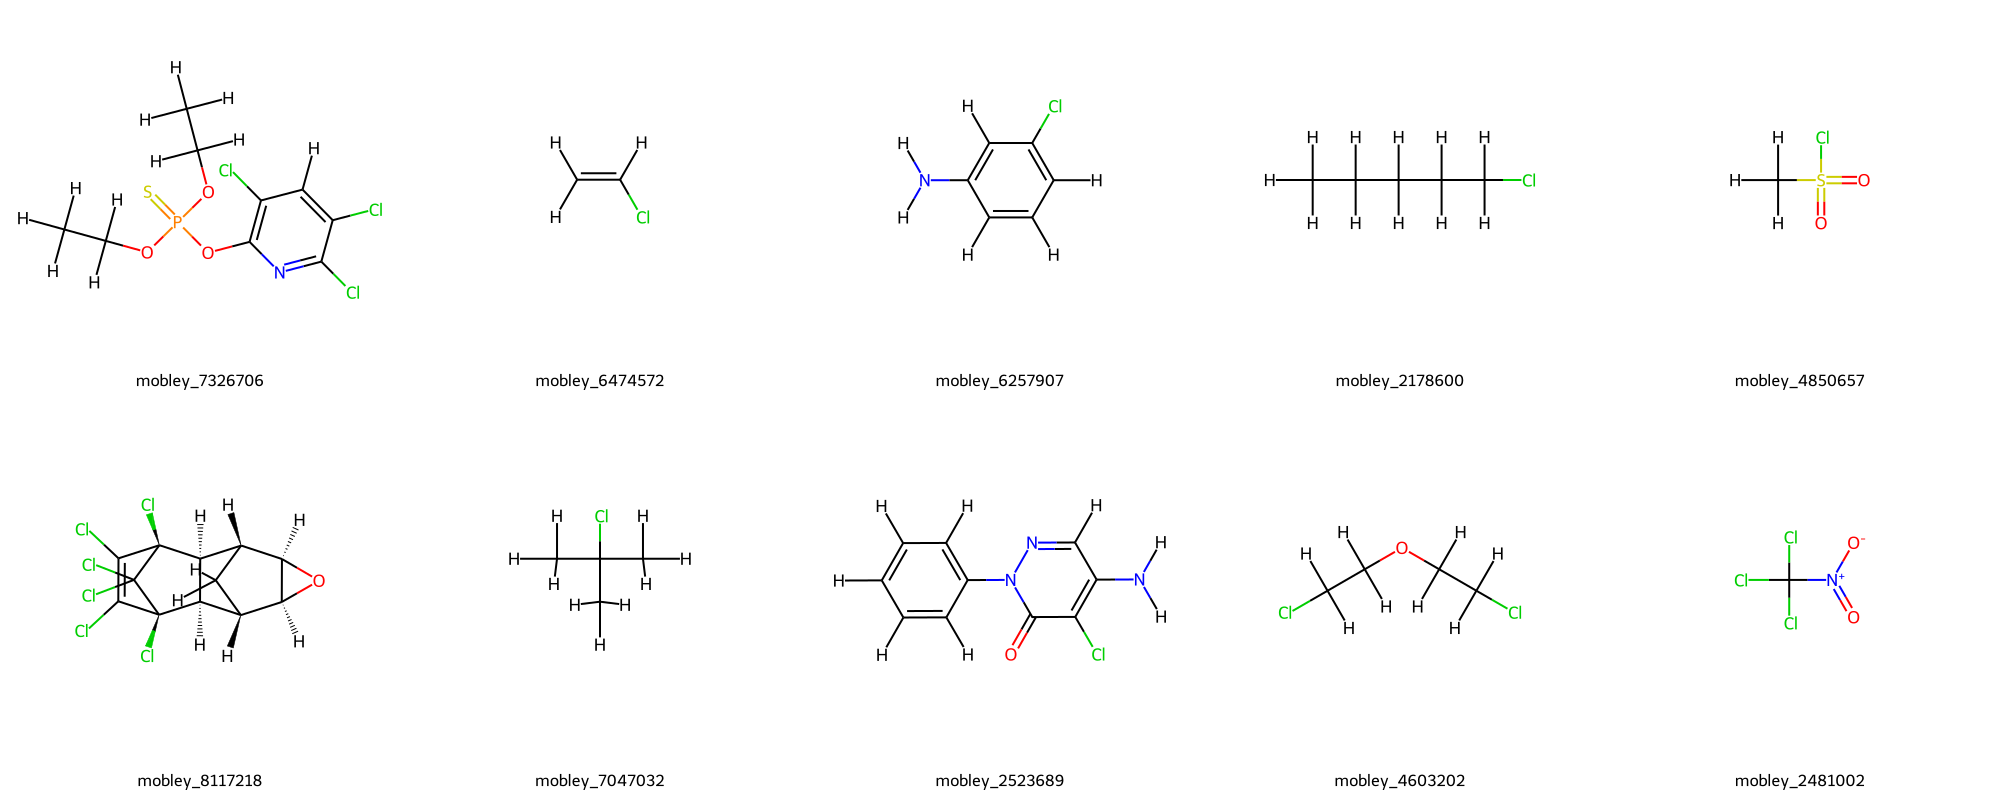

In [58]:
Draw.MolsToGridImage(greedy_chosen_mols_rd, legends=[m.GetProp("_Name") for m in greedy_chosen_mols_rd], molsPerRow=5, subImgSize=(400, 400))

In [55]:
for i in greedy_chosen_mols_rd:
    print(i.GetProp('_Name'))

mobley_7326706
mobley_6474572
mobley_6257907
mobley_2178600
mobley_4850657
mobley_8117218
mobley_7047032
mobley_2523689
mobley_4603202
mobley_2481002
